# Facial Detection in OpenCV for ME405
Done for the final project in ME405-01/04.<br>
Needed to get target acquisition in the pan-tilt mount system.

Author: James Hamilton McRoberts IV<br>
Date: June 1st, 2020

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

This next function is just a wrapper around the face classifier found in OpenCV. Not using ML, simple pattern hashing instead.<br>
The cascade provided is used to detect features in the provided image.

In [2]:
def detectFaces(cascadeClass, targetImage, scaleFactor=1.1, neighbors=5):
    # Get all faces in an image
    gray = cv2.cvtColor(targetImage, cv2.COLOR_BGR2GRAY)
    faces = cascadeClass.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=neighbors)
    
    return faces

This function marks up the image provided with the rectangles found from the previous function.

In [3]:
def markupImage(rectangles, image):
    # Copy and paste
    imgCopy = image.copy()
    for (x, y, w, h) in rectangles:
        cv2.rectangle(imgCopy, (x, y), (x+w, y+h), (0, 255, 0), 15)
        
    return imgCopy

## Testing

In [4]:
# Grab available images
import os
from os.path import isfile, join
path = "/Users/james/Code/Notebooks/faceResources"
faceData = [f for f in os.listdir(path) if isfile(join(path, f))]
faceCascade = cv2.CascadeClassifier('/usr/local/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt.xml')
print(faceData)

['2.jpg', '3.jpg', '1.jpg', '0.jpg']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


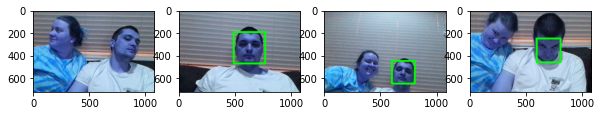

In [6]:
from time import sleep

#Detect and draw on images
cols = 4
rows = (len(faceData) / cols) + 1
fig = plt.figure(figsize=(10, 10))
idx = 0
for fname in faceData:
    # Process
    image = cv2.cvtColor(cv2.imread(join(path, fname), cv2.COLOR_BGR2RGB)
    faces = detectFaces(faceCascade, image)
    outputImg = markupImage(faces, image)
    
    # Display
    fig.add_subplot(rows, cols, idx + 1)
    plt.imshow(outputImg)
    idx += 1
fig.show()

# It works